![](.4_images/7c9a75c6.png)

In [2]:
# 我们需要先安装对应的服务
# docker run -itd --name splash -p 8050:8050 scrapinghub/splash

这个服务是使用lua脚本来渲染的，我们先试一下最简单的示例,这里会访问百度，然后返回标题

```lua
function main(splash, args)
  -- 访问百度
  splash:go("https://www.baidu.com")
  -- 等待0.5s
  splash:wait(0.5)
  -- 执行脚本获取结果
  local title = splash:evaljs("document.title")
  return {title=title}
end
```

返回可以是字典，也可以是字符串

```lua
function main(splash)
  return {hello='world!'}
end
```

```lua
function main(splash)
  return 'hello'
end
```

splash可以进行异步处理
```lua
function main(splash, args)
  -- 需要访问的网站
  local urls = {'www.baidu.com', 'www.taobao.com', 'www.zhihu.com'}
  local results = {}
  -- 遍历网站
  for index,url in ipairs(urls) do
    -- 访问网站
    local ok,reason = splash:go('http://' .. url)
    if ok then
      -- 等待2s
      splash:wait(2)
      -- 获取对应的结果
      results[url] = splash:png()
     end
  end
  -- 返回对应的结果
 	return results
end
```

我们可以获取对象携带的一些属性
```lua
function main(splash, args)
  -- 获取参数的结果
	local url =args.url
  -- 上面这个和下面是等价的
  local url = splash.args.url
  return url
end
```

我们可以手动控制js是否执行

```lua
function main(splash, args)
  splash:go('https:://baidu.com')
  -- 关闭js
  splash.js_enabled = false
  -- 关闭后我们执行js就会报错
  local title = splash:evaljs("document.title")
  return {title=title}
end
```

还有一些其他用法
```lua
  -- 设置超时，如果超出时间就会没有响应
  splash.resource_timeout = 0.1
  -- 这里我们不加载图片，这样加载速度会提高很多（有缓存的情况下还是会显示图片）
  splash.images_enabled = false
  -- 设置浏览器插件是否加载（比如flash）
  splash.plugins_enabled = true
```

控制页面上下滚动

```lua
function main(splash, args)
  splash:go('https:://wwww.taobao.com')
  -- 向下滚动400像素
  splash.scroll_position = {y=400}
  return  {png=splash:png()}
end
```

![](.4_images/1e3669e0.png)

![](.4_images/1b2cfe2b.png)

![](.4_images/18f9793e.png)

![](.4_images/563117a5.png)

![](.4_images/5ae9815b.png)

![](.4_images/dbddd94a.png)

![](.4_images/74d69ac9.png)

![](.4_images/97d12fe3.png)

![](.4_images/d8d5ab11.png)

![](.4_images/2187b7b2.png)

![](.4_images/82df3aca.png)

![](.4_images/cbf94cd6.png)

![](.4_images/2c2d5c11.png)

![](.4_images/03d3f6cf.png)

![](.4_images/8236c97c.png)

![](.4_images/820567f5.png)

![](.4_images/9f02cac4.png)

![](.4_images/3d2415c8.png)

![](.4_images/ee4b5456.png)

![](.4_images/7eea5b96.png)

![](.4_images/b1aec849.png)

![](.4_images/ad9a9fed.png)

![](.4_images/88df7788.png)

![](.4_images/47d84836.png)

<!DOCTYPE html><!--STATUS OK--><html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon"><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索"><link rel="icon" sizes="any" mask="" href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"><link rel="dns-prefetch" href="//dss1.bdstatic.com"><link rel="dns-prefetch" href="//ss1.bdstatic.com"><link rel="dns-prefetch" href="//sp0.baidu.com"><link rel="dns-prefetch" href="//sp1.baidu.com"><link rel="dns-prefetch" href="//sp2.baidu.com"><title>百度一下，你就知道</title><style index="newi" type="text/css">#form .bdsug{t
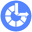

In [3]:
# 上面这些都是lua脚本的用法，下面我们去请求一下api接口
import requests

# 这里传入对应的url参数
url = 'http://192.168.1.60:8050/render.html?url=https://baidu.com'
response = requests.get(url)
# 这里直接返回对应的源代码
print(response.text)

<!DOCTYPE html><!--STATUS OK--><html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#ffffff"><meta name="description" content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon"><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索"><link rel="icon" sizes="any" mask="" href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"><link rel="dns-prefetch" href="//dss1.bdstatic.com"><link rel="dns-prefetch" href="//ss1.bdstatic.com"><link rel="dns-prefetch" href="//sp0.baidu.com"><link rel="dns-prefetch" href="//sp1.baidu.com"><link rel="dns-prefetch" href="//sp2.baidu.com"><title>百度一下，你就知道</title><style index="newi" type="text/css">#form .bdsug{t
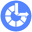

In [4]:
# 还可以设置等待时间，我们这里等待5s
url = 'http://192.168.1.60:8050/render.html?url=https://baidu.com&wait=5'
print(requests.get(url).text)

In [5]:
# 获取网页截图(png还可以换成jpeg)
url = 'http://192.168.1.60:8050/render.png?url=https://www.jd.com&wait=5&width=1000&height=700'
response =requests.get(url)
with open('res.png','wb') as f:
    f.write(response.content)

In [6]:
# 获取网页的har信息
url = 'http://192.168.1.60:8050/render.har?url=https://www.jd.com&wait=5'
print(requests.get(url).text)

{"log": {"version": "1.2", "creator": {"name": "Splash", "version": "3.5"}, "browser": {"name": "QWebKit", "version": "602.1", "comment": "PyQt 5.14.2, Qt 5.14.1"}, "entries": [{"_splash_processing_state": "finished", "startedDateTime": "2022-06-09T17:22:20.121087Z", "request": {"method": "GET", "url": "https://www.jd.com/", "httpVersion": "HTTP/1.1", "cookies": [], "queryString": [], "headers": [{"name": "User-Agent", "value": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/602.1 (KHTML, like Gecko) splash Version/10.0 Safari/602.1"}, {"name": "Accept", "value": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"}], "headersSize": 189, "bodySize": -1}, "response": {"bodySize": 174723, "httpVersion": "HTTP/1.1", "cookies": [], "headers": [{"name": "Server", "value": "nginx"}, {"name": "Date", "value": "Thu, 09 Jun 2022 09:26:56 GMT"}, {"name": "Content-Type", "value": "text/html; charset=utf-8"}, {"name": "Connection", "value": "keep-alive"}, {"name": "Vary", "value": "Accep

In [7]:
# 获取接口的所有功能
url = 'http://192.168.1.60:8050/render.json?url=https://httpbin.org'
print(requests.get(url).text)

{"url": "https://httpbin.org/", "requestedUrl": "https://httpbin.org/", "geometry": [0, 0, 1024, 768], "title": "httpbin.org"}


In [10]:
# 可以控制比如加上html=1就会返回html，如果加上可以加上png=1就会返回png，har=1就会返回har
url = 'http://192.168.1.60:8050/render.json?url=https://www.baidu.com&png=1'
print(requests.get(url).text)

{"png": "iVBORw0KGgoAAAANSUhEUgAABAAAAAMACAYAAAC6uhUNAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAgAElEQVR4AezdB3wb5f3H8Z+87TjO3gkEQhgJmYwwSsLeJexdChQKZRTKHmW07FGgg5a9/uxZoIVC2AFCIAQSSCCBhED2dob3+t/3wimSJdmSbckn+/PwEpJuPPfc+2RFz+8ZF6hzkpEQQAABBBBAAAEEEEAAAQQQQKBNC2S06bPj5BBAAAEEEEAAAQQQQAABBBBAwBUgAMAHAQEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAAQIAfAYQQAABBBBAAAEEEEAAAQQQaAcCBADawUXmFBFAAAEEEEAAAQQQQAABBBAgAMBnAAEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAAQIAfAYQQAABBBBAAAEEEEAAAQQQaAcCBADawUXmFBFAAAEEEEAAAQQQQAABBBAgAMBnAAEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAAQIAfAYQQAABBBBAAAEEEEAAAQQQaAcCBADawUXmFBFAAAEEEEAAAQQQQAABBBAgAMBnAAEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAAQIAfAYQQAABBBBAAAEEEEAAAQQQaAcCBADawUXmFBFAAAEEEEAAAQQQQAABBBAgAMBnAAEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAAQIAfAYQQAABBBBAAAEEEEAAAQQQaAcCBADawUXmFBFAAAEEEEAAAQQQQAABBBAgAMBnAAEEEEAAAQQQQAABBBBAAIF2IEAAoB1cZE4RAQQQQAABBBBAAAEEEEAAgZQFACorK+2UU06xpUuXxlRfuHBh2LpXXnn

In [12]:
# 下面介绍一下执行接口，执行接口可以执行lua脚本
import requests
from urllib.parse import quote

lua = '''
function main(splash)
    return 'hello'
end
'''
url = 'http://192.168.1.60:8050/execute?lua_source=' + quote(lua)
print(requests.get(url).text)

hello
